In [18]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ML_DAC/Project/impacts.csv')

In [6]:
df.head()

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [7]:
df.shape

(683, 11)

In [10]:
df.isnull().sum()

Object Name                      0
Period Start                     0
Period End                       0
Possible Impacts                 0
Cumulative Impact Probability    0
Asteroid Velocity                0
Asteroid Magnitude               0
Asteroid Diameter (km)           0
Cumulative Palermo Scale         0
Maximum Palermo Scale            0
Maximum Torino Scale             0
dtype: int64

In [14]:
print(df['Object Name'].unique())

['2006 WP1' '2013 YB' '2008 US' '2010 VR139' '2015 ME131' '2010 XB73'
 '2005 TM173' '2006 SF281' '2010 VP139' '2014 HR197' '2015 HV182'
 '2008 SH148' '2008 XK' '2010 XC' '2010 MY112' '2014 MO68' '2009 FZ4'
 '2008 VS4' '2009 VZ39' '2014 JT79' '2008 VL' '2010 WW8' '2008 EM68'
 '2015 HW182' '2012 BP123' '2008 EK68' '2005 ED224' '2014 MV67'
 '2016 JT38' '2008 JD33' '2005 NX55' '2008 UY91' '2014 OY391' '2010 JA43'
 '2015 HS182' '2011 CF66' '2016 AZ193' '2016 JO38' '2014 HD198'
 '2006 QV89' '2008 VB4' '2008 UV99' '2010 DJ77' '2014 ML67' '2004 ME6'
 '2007 FT3' '2014 MA68' '2016 RP41' '2012 BL14' '2014 HN198' '2016 NL56'
 '2001 YN2' '2001 UO' '2008 VM' '2001 CA21' '2016 JP38' '2008 YD3'
 '2010 UJ' '2010 AU118' '2009 TB' '2016 WN55' '2012 BK14' '2012 TC4'
 '2007 YM' '2015 HQ182' '2016 PO66' '2010 XN69' '2015 YV20' '2010 LJ68'
 '2015 HO182' '2017 AA21' '2016 VA18' '2016 QY84' '2017 AE21' '2017 AY20'
 '2008 UM1' '2010 CA55' '2010 XQ' '2015 HM182' '2006 CD' '2016 PR66'
 '2011 CW46' '2015 MC131' '2

In [16]:
df.drop(columns=['Object Name'],inplace=True)

In [17]:
df.head()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0


In [20]:
le = LabelEncoder()
df['Cumulative Impact Probability'] =  le.fit_transform(df['Cumulative Impact Probability'])
df.head()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2017,2017,1,44,17.77,28.3,0.007,-8.31,-8.31,0
1,2017,2046,23,297,8.98,31.4,0.002,-6.60,-6.96,0
2,2017,2062,30,251,18.33,31.4,0.002,-6.48,-6.87,0
3,2017,2076,24,125,4.99,26.7,0.016,-6.83,-6.95,0
4,2017,2096,85,71,19.46,19.2,0.497,-3.85,-4.30,0


In [21]:
df.nunique()

Period Start                     102
Period End                        93
Possible Impacts                 140
Cumulative Impact Probability    340
Asteroid Velocity                571
Asteroid Magnitude               118
Asteroid Diameter (km)           122
Cumulative Palermo Scale         392
Maximum Palermo Scale            378
Maximum Torino Scale               2
dtype: int64

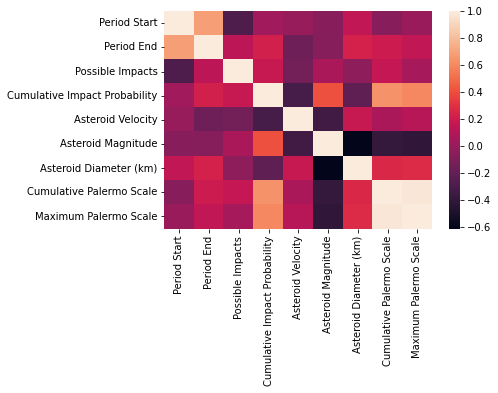

In [30]:
sb.heatmap(df.corr())

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Period Start                   683 non-null    int64  
 1   Period End                     683 non-null    int64  
 2   Possible Impacts               683 non-null    int64  
 3   Cumulative Impact Probability  683 non-null    int64  
 4   Asteroid Velocity              683 non-null    float64
 5   Asteroid Magnitude             683 non-null    float64
 6   Asteroid Diameter (km)         683 non-null    float64
 7   Cumulative Palermo Scale       683 non-null    float64
 8   Maximum Palermo Scale          683 non-null    float64
 9   Maximum Torino Scale           683 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 53.5+ KB


In [35]:
df.drop(columns='Maximum Torino Scale',inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Period Start                   683 non-null    int64  
 1   Period End                     683 non-null    int64  
 2   Possible Impacts               683 non-null    int64  
 3   Cumulative Impact Probability  683 non-null    int64  
 4   Asteroid Velocity              683 non-null    float64
 5   Asteroid Magnitude             683 non-null    float64
 6   Asteroid Diameter (km)         683 non-null    float64
 7   Cumulative Palermo Scale       683 non-null    float64
 8   Maximum Palermo Scale          683 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 48.1 KB


In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn import metrics


X = df.drop(columns='Possible Impacts')
y = df['Possible Impacts']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rf = RandomForestRegressor()

rf.fit(X_train,y_train)
y_predrf = rf.predict(X_test)

print("accuracy Random Forest Regressor:",r2_score(y_test, y_predrf))

accuracy Random Forest Regressor: 0.6000218422601571
